# Directory
1. [Central Limit Theorem](#1)
2. [Empirical CDFs](#2)
3. [Maximum Likelihood Estimators](#3)

 ## Central Limit Theorem <a name="1"></a>

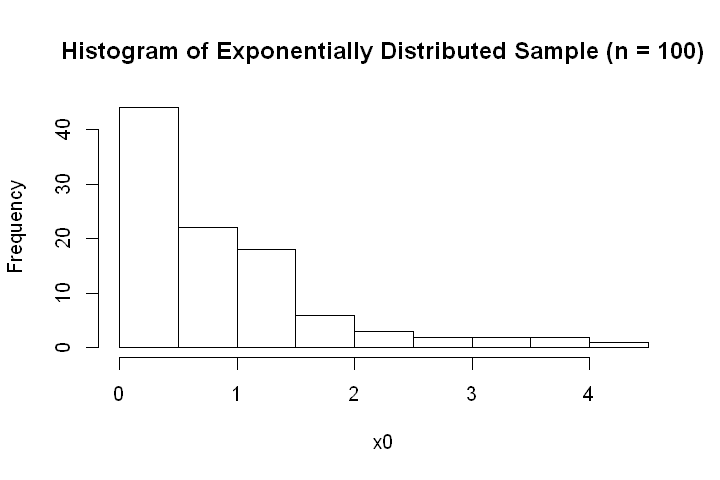

In [1]:
# set plot size
options(repr.plot.width = 6, repr.plot.height = 4)
# setting seed allows the randomly generated results to be reproduced
set.seed(101)
# random exponential dist, 100 values, lamda = 1
x0 <- rexp(100, 1)
# plot hist
hist(x0, main = "Histogram of Exponentially Distributed Sample (n = 100)")

In [2]:
EX <- 1 # mean
VarX <- 1 # var
s <- 2000 # number of samples
n <- c(5, 10, 50, 100, 1000) # sample size; c stands for combine

# create empty matrix
z <- matrix(NA, nrow = s, ncol = length(n))
head(z)

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [3]:
# fill in matrix
for (i in 1:s)
{
    for (j in 1:length(n))
    {   # loop over sample size
        samp <- rexp(n = n[j], 1) # generate sample
        M <-mean(samp) # sample mean
        z[i, j] <- (M - EX)/sqrt(VarX/n[j]) # calcualte z score
    }
}
head(z)

-0.1669253,-1.7076668,-0.1297386,0.4141978,-0.88765561
-0.8988581,-1.3218413,0.5917310,0.3993584,1.98187222
-0.7078120,0.4924594,0.6652227,-1.0568736,-0.60597427
-0.4623412,-0.6169199,-0.6588296,-2.0317606,0.56276234
0.2642828,0.4791667,-0.8537200,0.6219426,-0.08319398
0.6390162,-0.3817332,-0.2752130,0.8812396,1.20613316


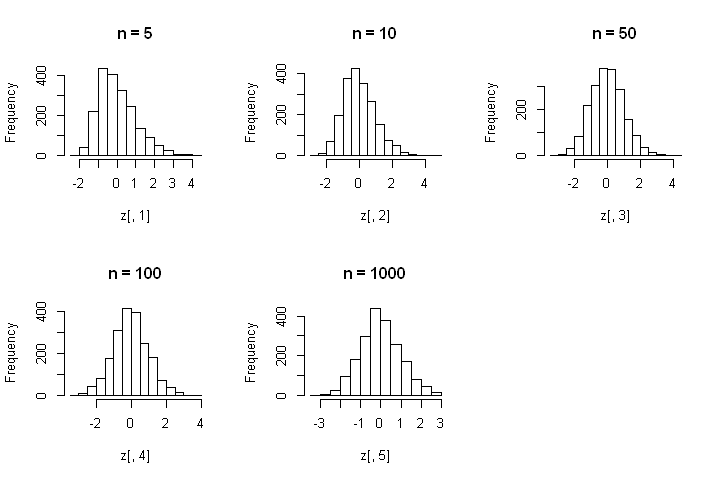

In [4]:
# format the layout so that 2x3 = 6 subplots fit in 1 page
par(mfrow = c(2, 3)) # par stands for partition
hist(z[, 1], main = paste("n =", n[1])) # 1st col of matrix z
hist(z[, 2], main = paste("n =", n[2])) # 2nd col...
hist(z[, 3], main = paste("n =", n[3]))
hist(z[, 4], main = paste("n =", n[4]))
hist(z[, 5], main = paste("n =", n[5]))

The above plot illustrates CLT: <br> 
- The distribution of sample means approaches a <em>normal</em> distribution as sample size increases, <br>regardless of parent distribution of population (exponential in this case).
- Assumption: the samples are random (i.e. independently and identically distributed).

 ## Empirical CDFs <a name="2"></a>

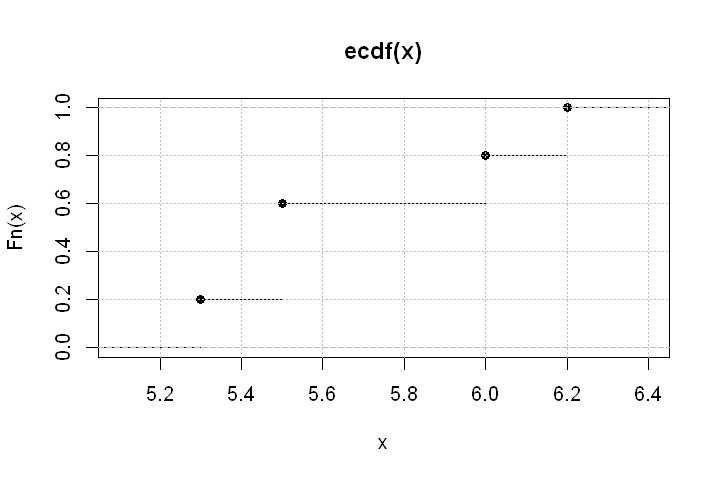

In [5]:
x <- c(5.5, 6.0, 5.3, 5.5, 6.2)
Fx <- ecdf(x) # empirical cdf (used for samples)
plot(Fx)
grid(col = "gray") 

 ## Maximum Likelihood Estimators <a name="3"></a>

Suppose the outcome of tossing a coin (represent as $\theta$) 5 times is given by s = (H, T, H, H, T) <br>
The MLE of P(heads) for this coin can be found in the following graphs:


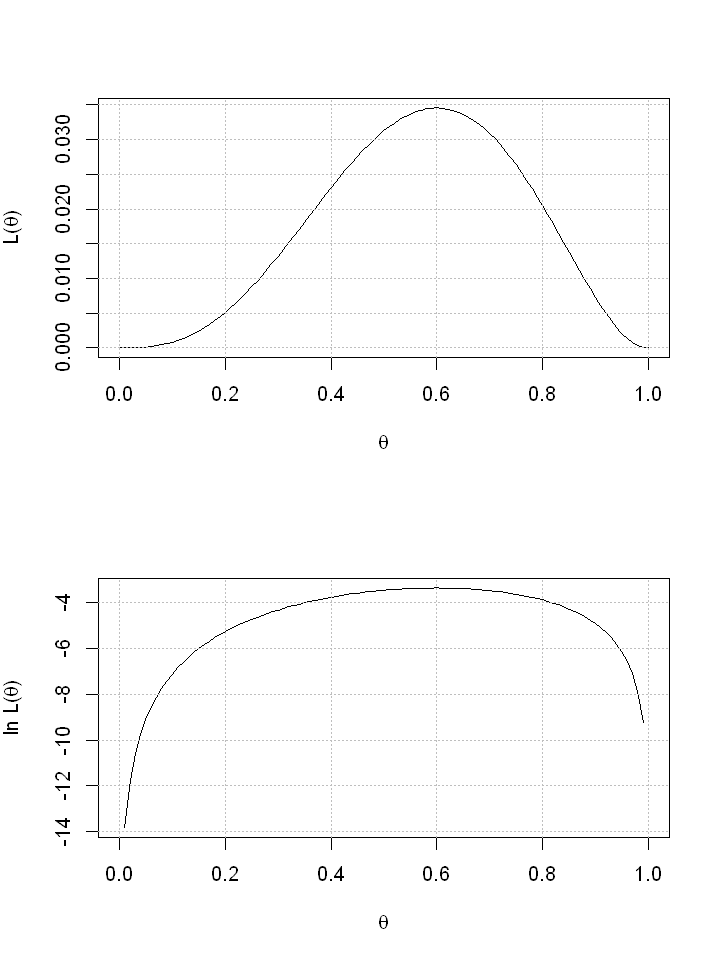

In [6]:
par(mfrow = c(2, 1))
options(repr.plot.width = 6, repr.plot.height = 8)

# model the likelihood function with Bernoulli(theta)
Ltheta = function(theta) {theta^3 *(1-theta)^2}
curve(Ltheta, from = 0, to = 1, 
      xlab = (expression(""*theta*"")), ylab = (expression("L("*theta*")")))
grid(col = 'grey')

# shortcut: since ln(x) is a 1-1 increasing function...
# value that maximizes L <-> value that maximizes ln(L)
# thus just need to find derivative of ln L(theta | s):
ltheta = function(theta) {3*log(theta) + 2*log(1-theta)}
curve(ltheta, from = 0, to = 1, 
      xlab = (expression(" "*theta*" ")), ylab = (expression("ln L("*theta*")")))
grid(col = 'grey')

The MLE is given by $\boldsymbol{\hat{\theta}}$ = 0.6 <br>
If given the number of heads in place of $s$, the result wouldn't change. <br>
The MLE would simply be scaled by a constant C = ${n\choose k}$ <br>
Thus, $\boldsymbol{\hat{\theta}}$ is a <em>sufficient statistic.</em>

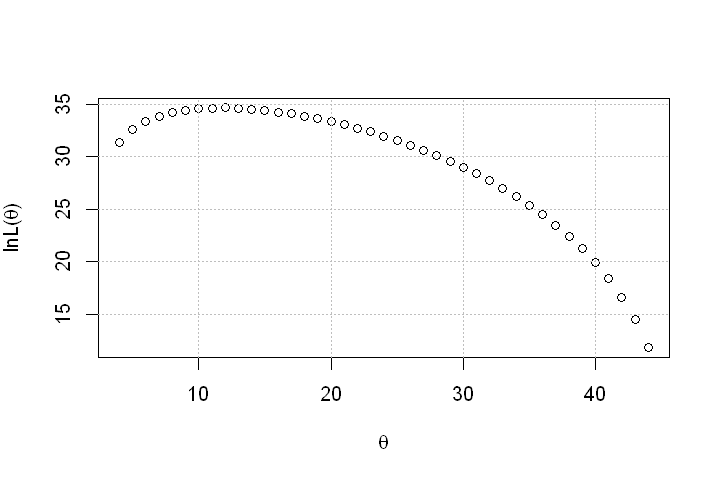

In [7]:
# One more log likelihood example: A random sample of size 20 is chosen from a finite population N = 60
# If 4 people are left-handed, plot the log likelihood function for all possible values of theta
options(repr.plot.width = 6, repr.plot.height = 4)

theta = c(4:44) # since 4 <= theta and 60 - theta >= 16
l = choose(theta, 4) * choose(60-theta, 16)
lnL = log(l)
plot (theta, lnL, xlab = (expression(""*theta*"")), ylab = (expression("lnL("*theta*")")))
grid(col = 'grey')